In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv('Downloads/archive/creditcard.csv')
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [15]:
from imblearn.over_sampling import SMOTE

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Scale 'Time' and 'Amount' columns
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Split data into features (X) and target (y)
X = data.drop('Class', axis=1) 
y = data['Class']

# Split into train and test sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Output the new shapes of the resampled training set
print(f'Resampled training set shape: {X_train_resampled.shape}')
print(f'Resampled class distribution:\n {pd.Series(y_train_resampled).value_counts()}')

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Training set shape: (199364, 30)
Test set shape: (85443, 30)
Resampled training set shape: (398040, 30)
Resampled class distribution:
 Class
0    199020
1    199020
Name: count, dtype: int64


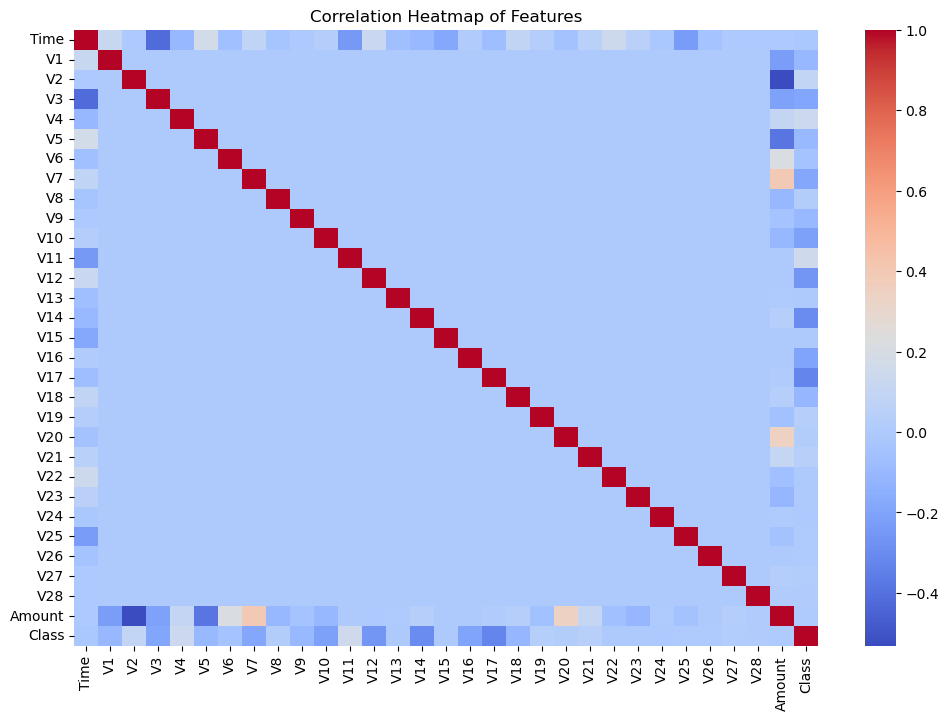

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Input Layer
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

# Hidden Layers
model.add(layers.Dense(128, activation='relu'))  # 1st hidden layer with 128 neurons
model.add(layers.Dropout(0.3))  # Dropout to prevent overfitting
model.add(layers.BatchNormalization())  # Batch normalization

model.add(layers.Dense(64, activation='relu'))  # 2nd hidden layer with 64 neurons
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation='relu'))  # 3rd hidden layer with 32 neurons
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())

# Output Layer (Binary Classification)
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\prash\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,233 (59.50 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0123
Epoch 2/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0107
Epoch 3/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0132
Epoch 4/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0101
Epoch 5/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0130
Epoch 6/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0074
Epoch 7/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0101
Epoch 8/20
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9994 - loss: 0

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confusion Matrix:
 [[56841    23]
 [   15    83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



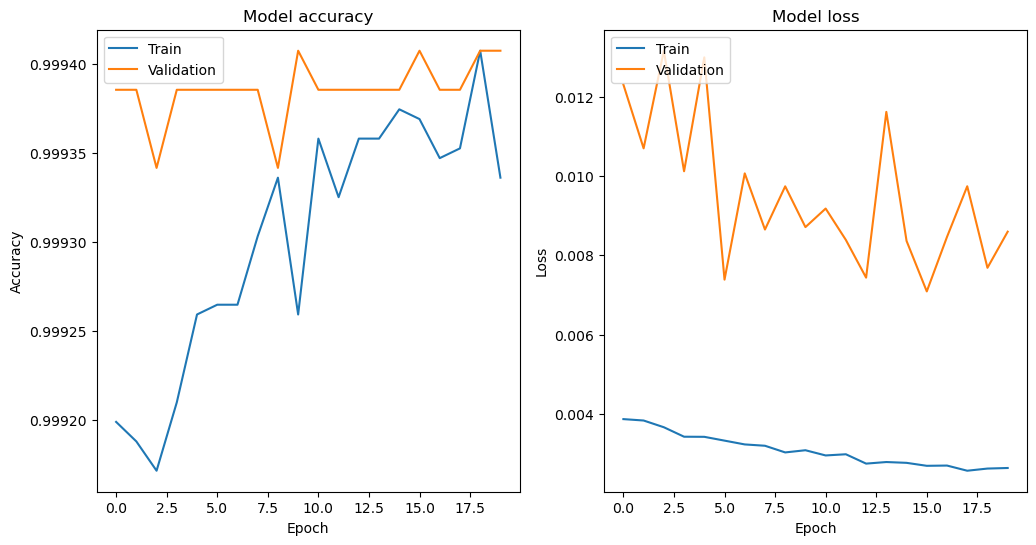

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [23]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 129.1/129.1 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch

# Define a hypermodel for tuning
def build_model(hp):
    model = Sequential()
    
    # Input layer (fixed number of features)
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train_resampled.shape[1]))

    # Tune number of hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):  # Tune number of layers between 1 and 4
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))  # Tune dropout rate

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with hyperparameter tuning for optimizer and learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [29]:
from keras_tuner import HyperParameters

# Define the tuner
tuner = RandomSearch(
    build_model,  # Pass the hypermodel function
    objective='val_accuracy',  # Tune based on validation accuracy
    max_trials=1,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train the model for each hyperparameter configuration
    directory='hyperparameter_tuning',  # Directory to save logs and checkpoints
    project_name='fraud_detection_tuning'
)

# Run hyperparameter search
tuner.search(X_train_resampled, y_train_resampled,
             epochs=10,
             validation_data=(X_test, y_test),
             verbose=1)


Trial 3 Complete [00h 08m 27s]
val_accuracy: 0.9992451071739197

Best val_accuracy So Far: 0.9992451071739197
Total elapsed time: 00h 39m 49s


In [32]:
# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Input Units: {best_hyperparameters.get('units_input')}")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_layers')}")
for i in range(best_hyperparameters.get('num_layers')):
    print(f"Units in Layer {i + 1}: {best_hyperparameters.get(f'units_{i}')}")
    print(f"Dropout Rate in Layer {i + 1}: {best_hyperparameters.get(f'dropout_{i}')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")


Best Hyperparameters:
Input Units: 320
Number of Hidden Layers: 1
Units in Layer 1: 480
Dropout Rate in Layer 1: 0.0
Learning Rate: 0.0001


In [34]:
# Build the final model with the best hyperparameters
final_model = Sequential()

# Input layer
final_model.add(Dense(units=best_hyperparameters.get('units_input'), activation='relu', input_dim=X_train_resampled.shape[1]))

# Add hidden layers
for i in range(best_hyperparameters.get('num_layers')):
    final_model.add(Dense(units=best_hyperparameters.get(f'units_{i}'), activation='relu'))
    final_model.add(Dropout(rate=best_hyperparameters.get(f'dropout_{i}')))  # Apply dropout

final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(
    optimizer=Adam(learning_rate=best_hyperparameters.get('learning_rate')),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [36]:
# Train the final model
history = final_model.fit(X_train_resampled, y_train_resampled,
                          epochs=20,  # You can adjust epochs as needed
                          validation_data=(X_test, y_test),
                          batch_size=32,  # You can choose a suitable batch size
                          verbose=1)

Epoch 1/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9948 - loss: 0.0187 - val_accuracy: 0.9975 - val_loss: 0.0130
Epoch 2/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9986 - val_loss: 0.0113
Epoch 3/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9989 - val_loss: 0.0116
Epoch 4/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 0.9991 - val_loss: 0.0116
Epoch 5/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9991 - val_loss: 0.0114
Epoch 6/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9993 - val_loss: 0.0119
Epoch 7/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9998 - loss: 9.2149e-04 - val_accuracy: 0.9990 - val_loss: 0.0140
Epoch 8/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accura

In [37]:
# Evaluate the model on the test data
loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0190
Test Accuracy: 0.9992


In [38]:
final_model.save('fraud_detection_model.h5')

In [ ]:
# Make predictions
predictions = final_model.predict(X_test)

# Convert probabilities to binary output (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Display some predictions
print(predicted_classes[:10])
